In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# json 형태 파일 불러오는 라이브러리
from urllib.request import Request, urlopen
from urllib.parse import urlencode, quote_plus
from pandas.io.json import json_normalize
import json

# 1. 데이터 수집
* 수집기간 : 2018-01-01~2019-10-31

* 설명 : 방문목적별 입도객 현황

* 변수 : 

|변수명|샘플데이터|항목설명|
|:---:|:---:|:---:|
|dtYearMonth|201910|날짜|
|visitorCnt|1044280|방문자수|
|visitPurpose|개별여행|방문목적|

* 출처 : [제주데이터허브](https://www.jejudatahub.net/data/view/data/580)

In [3]:
final = pd.DataFrame()

dt = ['201801','201802','201803','201804','201805','201806','201807','201808','201809','201810','201811','201812',
      '201901','201902','201903','201904','201905','201906','201907','201908','201909','201910']

# 월별로 데이터 수집
for i in range(len(dt)) :
  url = 'https://open.jejudatahub.net/api/proxy/DtaDa0555D801Da508DbDtt5t1bat1ta/3_6j73ptcj_9t6p696_9o7t3r__tj7op'
  queryParams = '?' + urlencode({quote_plus('startDate') : dt[i],
                                quote_plus('endDate') : dt[i]})
  response = urlopen(url + queryParams)
  json_api = response.read().decode("utf-8")
  json_file = json.loads(json_api)

  df=pd.json_normalize(json_file['data'])
  df2 = df.T
  df2.columns = df2.loc['visitPurpose']
  df3 = df2.drop(['dtYearMonth','visitPurpose'])

# 수집된 월별 데이터 병합
  final = pd.concat([final,df3])
final

,회의및업무,레저스포츠,부분패키지,휴양및관람,패키지,개별여행,교육여행,기타방문,친지방문
visitorCnt,78743,126413,83664,757889,29762,931530,234,2936,78741
visitorCnt,54538,103573,130051,681718,31465,731347,0,2690,50344
visitorCnt,97756,94279,152597,758206,47396,833785,18785,9912,54840
visitorCnt,175460,180153,289775,772325,218246,716499,62891,5109,28582
visitorCnt,52129,149737,198131,823440,191777,815996,73417,65940,41241
visitorCnt,54838,161547,196771,870959,46173,935068,10689,2560,77419
visitorCnt,61369,124283,157426,867169,43148,922316,3123,2906,64040
visitorCnt,36720,136388,78686,949466,29427,1038643,3199,5246,15737
visitorCnt,69860,64870,152195,858283,65658,880738,25738,12475,67365
visitorCnt,121210,136051,123683,700049,136307,868257,69517,17315,84105


In [4]:
# '월' 칼럼 생성
final['mon_date'] = ['2018-01','2018-02','2018-03','2018-04','2018-05','2018-06','2018-07','2018-08','2018-09','2018-10','2018-11','2018-12',
                    '2019-01','2019-02','2019-03','2019-04','2019-05','2019-06','2019-07','2019-08','2019-09','2019-10']

final2 = final.reset_index()

final3 = final2.drop(['index'],axis=1)
final3

,회의및업무,레저스포츠,부분패키지,휴양및관람,패키지,개별여행,교육여행,기타방문,친지방문,mon_date
0,78743,126413,83664,757889,29762,931530,234,2936,78741,2018-01
1,54538,103573,130051,681718,31465,731347,0,2690,50344,2018-02
2,97756,94279,152597,758206,47396,833785,18785,9912,54840,2018-03
3,175460,180153,289775,772325,218246,716499,62891,5109,28582,2018-04
4,52129,149737,198131,823440,191777,815996,73417,65940,41241,2018-05
5,54838,161547,196771,870959,46173,935068,10689,2560,77419,2018-06
6,61369,124283,157426,867169,43148,922316,3123,2906,64040,2018-07
7,36720,136388,78686,949466,29427,1038643,3199,5246,15737,2018-08
8,69860,64870,152195,858283,65658,880738,25738,12475,67365,2018-09
9,121210,136051,123683,700049,136307,868257,69517,17315,84105,2018-10


In [ ]:
final3.to_csv('/content/drive/MyDrive/21 세미프로젝트_2차 (1)/new_data/new_입도객현황.CSV', encoding='cp949',index=False)

# 2. 데이터 탐색

1) null값 확인

2) 분포 확인

## 1) null값 확인

In [6]:
final3.isna().sum()

회의및업무       0
레저스포츠       0
부분패키지       0
휴양및관람       0
패키지         0
개별여행        0
교육여행        0
기타방문        0
친지방문        0
mon_date    0
dtype: int64

In [11]:
final3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   회의및업무     22 non-null     object
 1   레저스포츠     22 non-null     object
 2   부분패키지     22 non-null     object
 3   휴양및관람     22 non-null     object
 4   패키지       22 non-null     object
 5   개별여행      22 non-null     object
 6   교육여행      22 non-null     object
 7   기타방문      22 non-null     object
 8   친지방문      22 non-null     object
 9   mon_date  22 non-null     object
dtypes: object(10)
memory usage: 1.8+ KB


In [13]:
final3.columns[:len(final3.columns)-1]

Index(['회의및업무', '레저스포츠', '부분패키지', '휴양및관람', '패키지', '개별여행', '교육여행', '기타방문',
       '친지방문'],
      dtype='object')

In [15]:
final3[final3.columns[:len(final3.columns)-1]] = final3[final3.columns[:len(final3.columns)-1]].apply(pd.to_numeric)

In [16]:
final3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   회의및업무     22 non-null     int64 
 1   레저스포츠     22 non-null     int64 
 2   부분패키지     22 non-null     int64 
 3   휴양및관람     22 non-null     int64 
 4   패키지       22 non-null     int64 
 5   개별여행      22 non-null     int64 
 6   교육여행      22 non-null     int64 
 7   기타방문      22 non-null     int64 
 8   친지방문      22 non-null     int64 
 9   mon_date  22 non-null     object
dtypes: int64(9), object(1)
memory usage: 1.8+ KB


## 2) 분포 확인

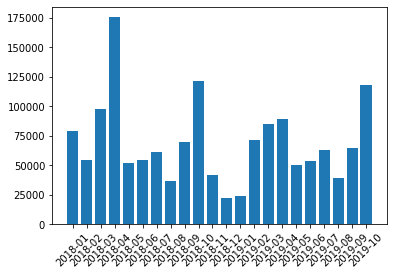

In [19]:
plt.bar(final3['mon_date'], final3['회의및업무'])
plt.xticks(rotation=45)
plt.show()

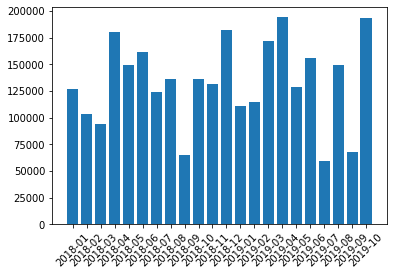

In [20]:
plt.bar(final3['mon_date'], final3['레저스포츠'])
plt.xticks(rotation=45)
plt.show()

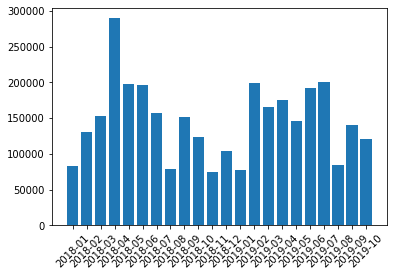

In [21]:
plt.bar(final3['mon_date'], final3['부분패키지'])
plt.xticks(rotation=45)
plt.show()

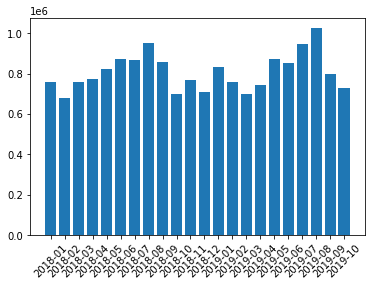

In [22]:
plt.bar(final3['mon_date'], final3['휴양및관람'])
plt.xticks(rotation=45)
plt.show()

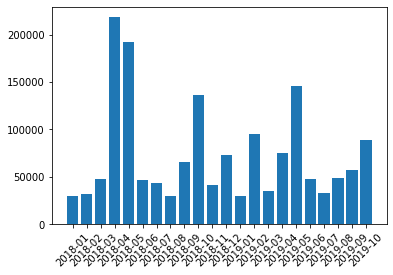

In [23]:
plt.bar(final3['mon_date'], final3['패키지'])
plt.xticks(rotation=45)
plt.show()

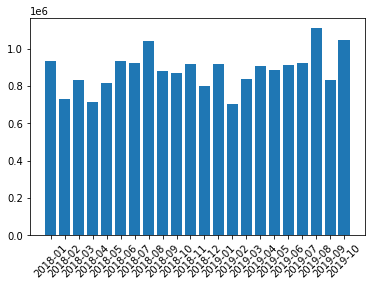

In [24]:
plt.bar(final3['mon_date'], final3['개별여행'])
plt.xticks(rotation=45)
plt.show()

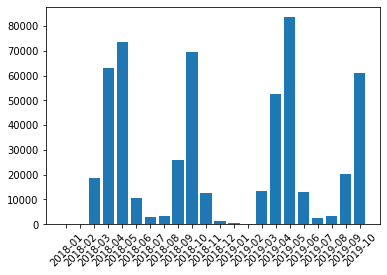

In [25]:
plt.bar(final3['mon_date'], final3['교육여행'])
plt.xticks(rotation=45)
plt.show()

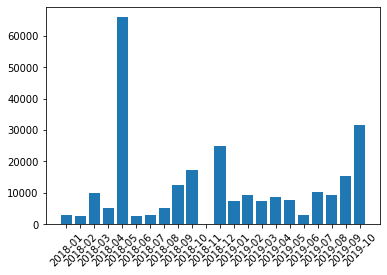

In [26]:
plt.bar(final3['mon_date'], final3['기타방문'])
plt.xticks(rotation=45)
plt.show()

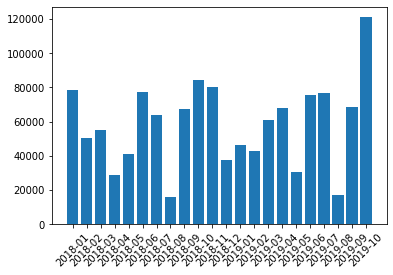

In [27]:
plt.bar(final3['mon_date'], final3['친지방문'])
plt.xticks(rotation=45)
plt.show()